# Clustering

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


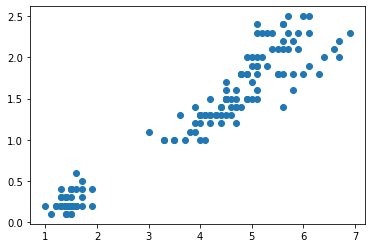

In [6]:
petals = pd.DataFrame(iris_data_pd.values[:,2:4], columns=['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:,0], petals.values[:,1])
plt.show()

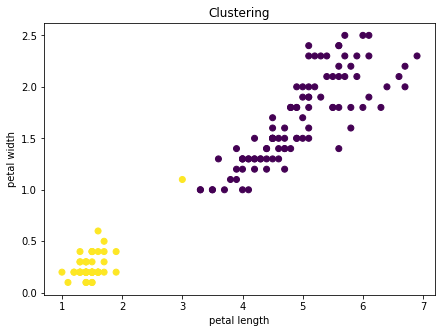

In [7]:
from sklearn.cluster import KMeans

plt.figure(figsize=(7, 5))
km = KMeans(n_clusters=2, random_state=20)
km.fit(iris_data_pd.iloc[:,2:4])
y_pred = km.predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Clustering")
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.show()

In [8]:
print(km.predict(iris_data_pd.iloc[:,2:4]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [10]:
print(iris_data_pd.iloc[98, 2:4])

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [11]:
# 기준값은 attributes 중 cluster_centers_로 확인 가능
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [13]:
# 각 기준점부터의 euclidian 거리를 계산
def distance(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  squared = dx**2 + dy**2
  result = math.sqrt(squared)
  return result

print('0 cluster distance: ', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print('1 cluster distance: ', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[1][0], km.cluster_centers_[1][1]))

0 cluster distance:  2.0112458036464465
1 cluster distance:  1.7246990164733285


클러스터의 분류 갯수 변경

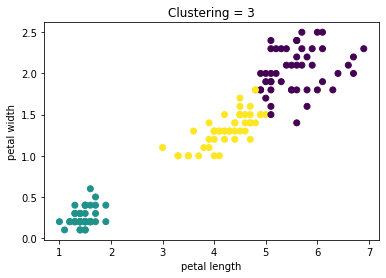

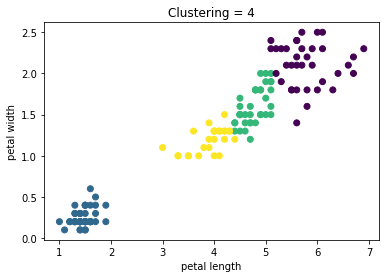

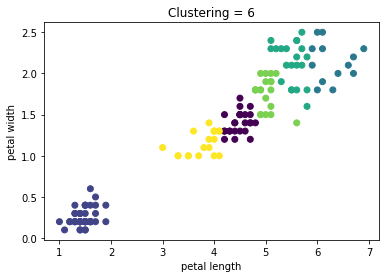

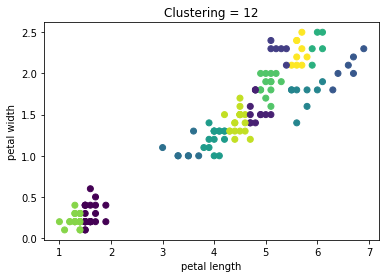

In [16]:
n_cluster = [3, 4, 6, 12]

for i in n_cluster:
  count = 1
  km = KMeans(n_clusters= i, random_state=20)
  km.fit(iris_data_pd.iloc[:,2:4])
  y_pred = km.predict(iris_data_pd.iloc[:,2:4])
  plt.figure(count)
  plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
  plt.title("Clustering = "+ str(i))
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  count = count+1
  plt.show()

클러스터들을 각 영역별로 쪼개어 표시할 수 있는 Voronoi 그래프로 묘사

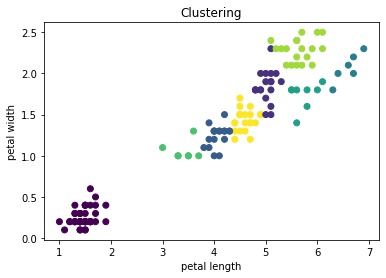

In [23]:
km12 = KMeans(n_clusters=8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred12)
plt.show()

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
km12 = KMeans(n_clusters=8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])

# plot the decision boundary. For that, we will assign a color to each
x_min, x_max = iris_data_pd.iloc[:, 2].min() - 1, iris_data_pd.iloc[:, 2].max() + 1
y_min, y_max = iris_data_pd.iloc[:, 3].min() - 1, iris_data_pd.iloc[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

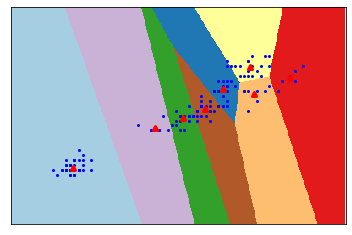

In [26]:
# obtain labels for each point in mesh. Use last trained model
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo', markersize=2)

# plot the centroids as a white x
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=16, linewidths=3, color='r', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

예제1

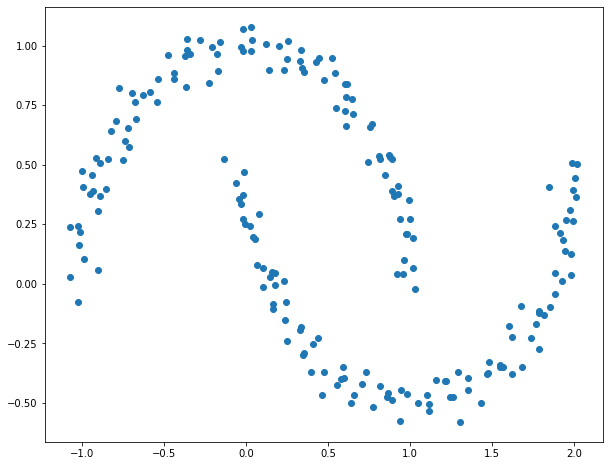

In [36]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(200, noise=0.05, random_state=0)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [37]:
from sklearn.cluster import KMeans

clusters = KMeans(2).fit_predict(X)

# 아래 세줄을 위에 한줄로..
# km = KMeans(n_clusters=2, random_state=20)
# km.fit(iris_data_pd.iloc[:,2:4] 
# y_pred = km.predict(iris_data_pd.iloc[:,2:4])

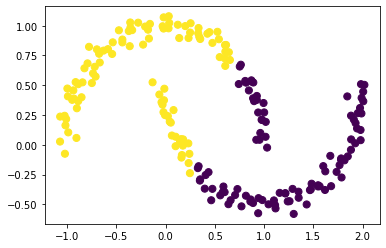

In [38]:
plt.scatter(X[:,0], X[:,1], c=clusters, s=50, cmap='viridis')

예제2

In [42]:
from sklearn.datasets import load_digits

digits = load_digits()

In [44]:
digits.data.shape

(1797, 64)

In [46]:
from sklearn.cluster import KMeans

km = KMeans(10)
clus = km.fit_predict(digits.data)

In [47]:
km.cluster_centers_.shape

(10, 64)

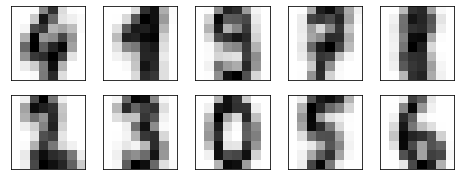

In [48]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = km.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)